# Pymaceuticals Inc.

#Analysis

Data Cleaning:
An initial scan, using a filter on the CSV file showed no special characters in the data. The only cleanup will be to remove the duplicate mice id's. The cleanup resulted in removing one mouse from the database. 

Colors chosen from:
https://matplotlib.org/stable/users/explain/colors/colormaps.html#lightness-of-matplotlib-colormaps

Observations:
I set up the line graph of ‘tumor volume’ vs. ‘time point’ to pull randomly selected mice on the Capomulin treatment. Running that piece of code multiple times appears to show no evidence that drug regimen worked. On the randomly generated mice, some tumor volumes went up in weight over time, some tumor weights went down over time, while others held consent. There was not an overwhelming showing of a decrease in tumor weights. 

I did find the result of potential outliers to be surprising. Within the dataset there was only one potential outlier. The database consisted of over 1800 data points and to only have one potential outlier would appear to be an abnormal result. On the other hand, having one outlier is confirmation that the data is relatively centrally located around itself.

The last graph that was generated was the correlation of mouse weight to tumor weight. There was a large correlation (.84) between the two. This observation is not surprising, based on the fact that a larger mouse would be able to host a larger tumor.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import random
from pathlib import Path
from scipy.stats import linregress

# Load the files
mouse_metadata_to_load = Path("https://github.com/njlanger/Module_5_Pymaceuticals/data/Mouse_metadat.csv")
study_results_to_load = Path("https://github.com/njlanger/Module_5_Pymaceuticals/data/Study_results.csv")

# Study data files
mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
mouse_data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_count = mouse_data_complete["Mouse ID"].nunique()
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_data_complete[mouse_data_complete.duplicated(subset = ["Mouse ID","Timepoint"],keep=False)]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = mouse_data_complete[mouse_data_complete.duplicated(subset = ["Mouse ID","Timepoint"],keep=False)]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_to_drop = "g989"
clean_mouse = mouse_data_complete[mouse_data_complete['Mouse ID'] != mouse_to_drop]
clean_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = clean_mouse["Mouse ID"].nunique()
new_mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Group by Drug Regimen
grouped = clean_mouse.groupby("Drug Regimen")

# mean,median, variance, SD
mean = grouped["Tumor Volume (mm3)"].mean()
median = grouped["Tumor Volume (mm3)"].median()
variance = grouped["Tumor Volume (mm3)"].var()
std_dev = grouped["Tumor Volume (mm3)"].std()

#SEM
sem = grouped["Tumor Volume (mm3)"].apply(lambda x: st.sem(x,ddof=0))

summary_df = pd.DataFrame({
    "Mean Tumor Volume":mean,
    "Median Tumor Volume":median,
    "Tumor Volume Variance":variance,
    "Tumor Volume Std. Dev.":std_dev,
    "Tumor Volume Std. Err.":sem
})

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.328629
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.468499
Infubinol,52.884795,51.820584,43.128684,6.567243,0.490851
Ketapril,55.235638,53.698743,68.553577,8.279709,0.602252
Naftisol,54.331565,52.509285,66.173479,8.134708,0.594860
Placebo,54.033581,52.288934,61.168083,7.821003,0.579722
Propriva,52.320930,50.446266,43.852013,6.622085,0.542490
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320250
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.571526


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_df = clean_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Std='std',
    SEM=lambda x:st.sem(x,ddof=0)
)

summary_df

,Mean,Median,Variance,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.328629
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.468499
Infubinol,52.884795,51.820584,43.128684,6.567243,0.490851
Ketapril,55.235638,53.698743,68.553577,8.279709,0.602252
Naftisol,54.331565,52.509285,66.173479,8.134708,0.594860
Placebo,54.033581,52.288934,61.168083,7.821003,0.579722
Propriva,52.320930,50.446266,43.852013,6.622085,0.542490
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320250
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.571526


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

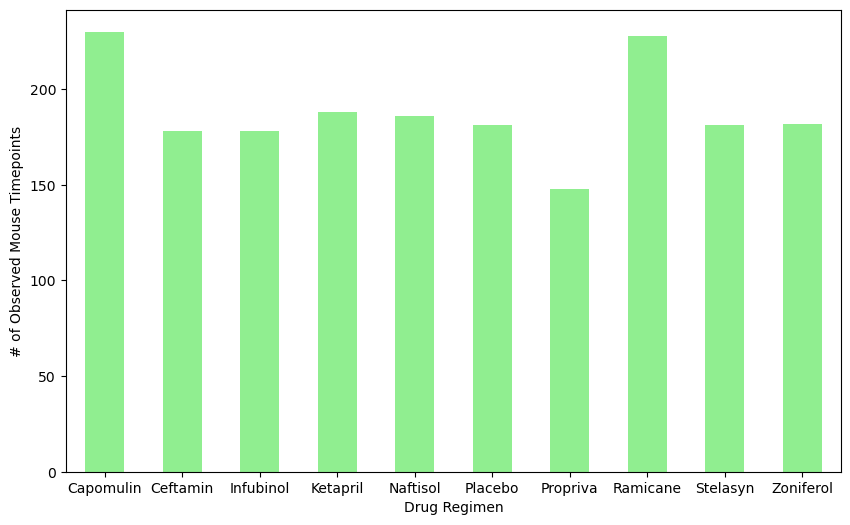

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# group by drug regimen and count rows
regime_counts = clean_mouse.groupby("Drug Regimen").size()

# create the chart
regime_counts.plot(kind="bar", color="lightgreen",figsize=(10,6))
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=0)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

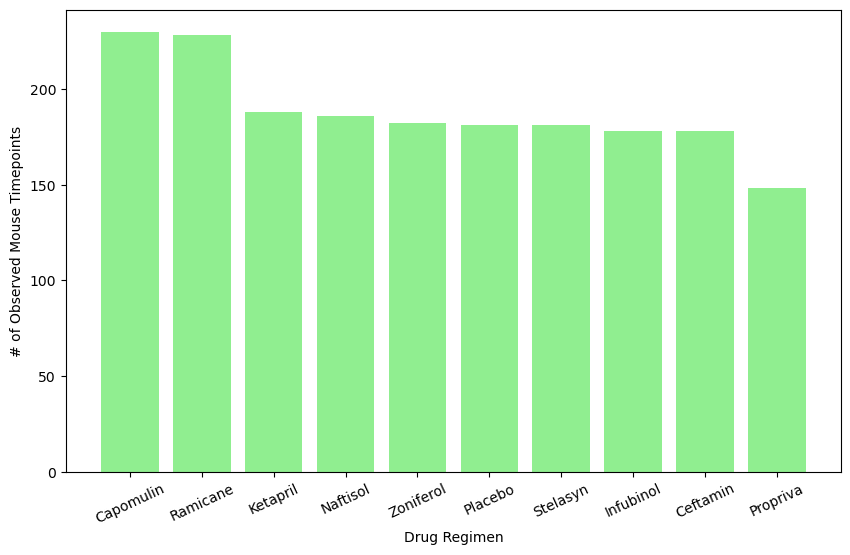

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = clean_mouse["Drug Regimen"].value_counts()

# Create the chart
plt.figure(figsize=(10,6))
plt.bar(regimen_counts.index, regimen_counts,color="lightgreen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=25)
plt.show

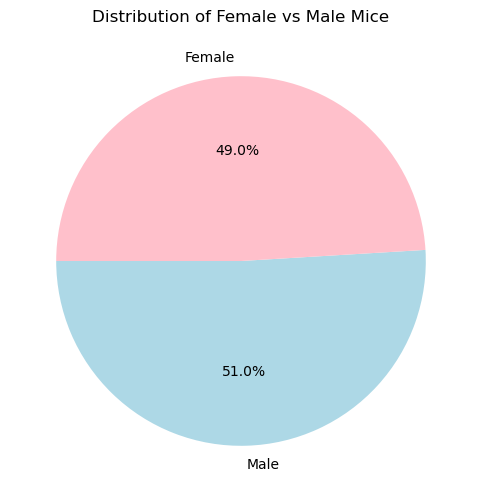

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Calculate the sex distribution
sex_distribution = clean_mouse['Sex'].value_counts()

# Create the plot
sex_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'pink'], startangle=180, figsize=(6,6))
plt.title("Distribution of Female vs Male Mice")
plt.ylabel('') 
plt.show()

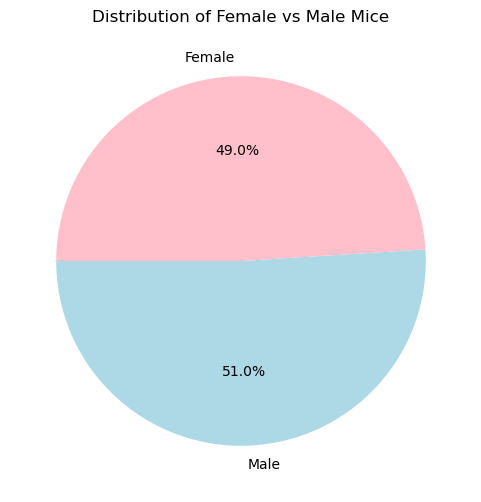

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# numbers found using above chart
sex_distribution = [51, 49]  

# Labels for the pie chart
labels = ['Male', 'Female']

# Colors for the segments
colors = ['lightblue', 'Pink']

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sex_distribution, labels=labels, colors=colors, autopct='%1.1f%%', startangle=180)
plt.title("Distribution of Female vs Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timpoint = clean_mouse.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint, 
final_tumor_volume = last_timpoint.merge(clean_mouse, on=['Mouse ID', 'Timepoint'])

# Filter on Drug regimes
final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

final_tumor_volume

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


In [14]:
# Put treatments into a list for the for loop
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty dictionary to store results for each treatment
tumor_vol_data = {}

# Loop through each treatment
for treatment in treatments:
    # Locate the rows which contain mice on the current treatment
    treatment_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]
    
    # Get the tumor volumes for the current treatment
    tumor_volumes = treatment_data['Tumor Volume (mm3)']

    # Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = tumor_volumes.quantile([0.25, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q

    # Determine lower and upper bounds for potential outliers
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    
    # Determine outliers using upper and lower bounds
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]

    # Store the results for the current treatment in the dictionary
    tumor_vol_data[treatment] = {
        "IQR": iqr,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Potential Outliers": outliers.tolist()
    }

    # Print the results for the current treatment
    print(f"Treatment: {treatment}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential Outliers: {outliers.tolist()}")
    print("\n")

Treatment: Capomulin
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential Outliers: []


Treatment: Ramicane
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential Outliers: []


Treatment: Infubinol
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential Outliers: [36.3213458]


Treatment: Ceftamin
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential Outliers: []




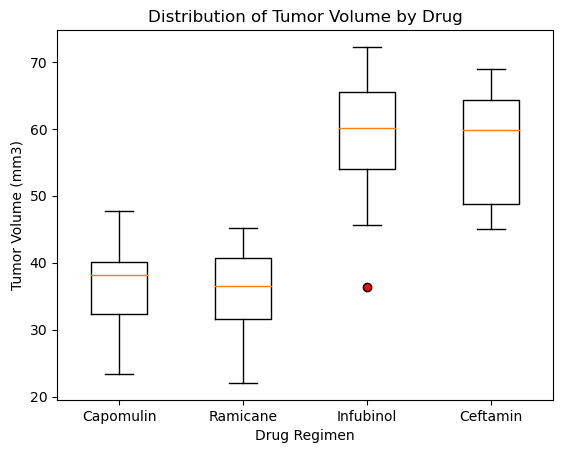

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Create a list of data for the box plot
data = [final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)'].values for treatment in treatments]

# Create a box plot
outlier_color = dict(markerfacecolor='r')
plt.boxplot(data, labels=treatments, flierprops=outlier_color)

# Set labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Distribution of Tumor Volume by Drug")

plt.show()

## Line and Scatter Plots

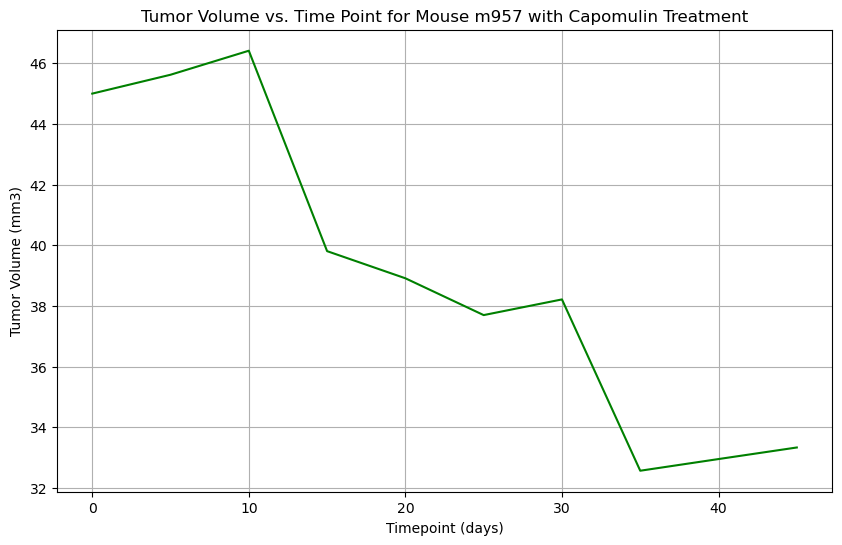

In [24]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Get a list of unique mice treated with Capomulin
capomulin_mice = clean_mouse[clean_mouse['Drug Regimen'] == 'Capomulin']['Mouse ID'].unique()

# Choose a random mouse from the list
selected_mouse = random.choice(capomulin_mice)

# Filter the data for the selected mouse and Capomulin regimen
capomulin_data = clean_mouse[(clean_mouse['Drug Regimen'] == 'Capomulin') & (clean_mouse['Mouse ID'] == selected_mouse)]

# Create a line plot of tumor volume vs. time point
plt.figure(figsize=(10, 6))
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], color='g', linestyle='-')

# Labels
plt.title(f"Tumor Volume vs. Time Point for Mouse {selected_mouse} with Capomulin Treatment")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)

plt.show()

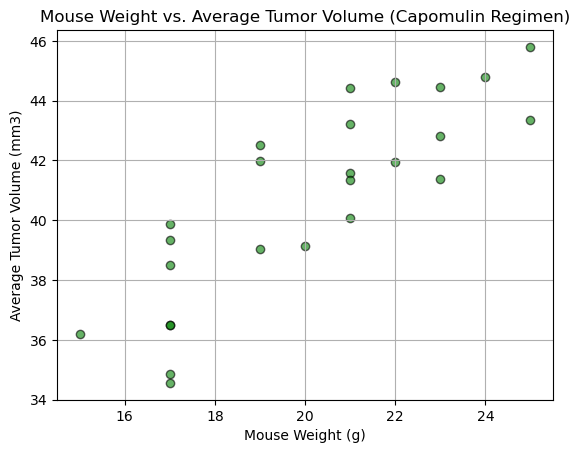

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Pull the 'Capomulin' subset 
capomulin_data = clean_mouse[clean_mouse['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding mouse weight
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()

# Create the scatter plot
plt.scatter(mouse_weight, average_tumor_volume, marker='o', facecolors='g', edgecolors='k',  alpha=0.6)

# labels
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)

plt.show()

## Correlation and Regression

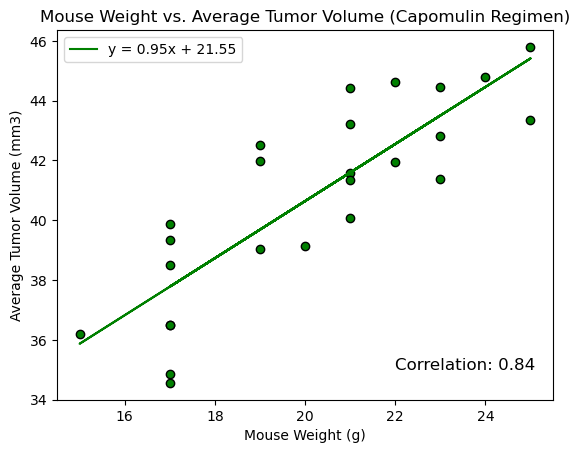

In [18]:
# Calculate the correlation coefficient and a linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Get weight and average tumor volume data from above cell
weight_data = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
tumor_volume_data = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Calculate the correlation coefficient
correlation = weight_data.corr(tumor_volume_data)

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(weight_data, tumor_volume_data)

# Regression equation
regression_line = f"y = {slope:.2f}x + {intercept:.2f}"

# Create a scatter plot
plt.scatter(weight_data, tumor_volume_data, marker='o', facecolors='g', edgecolors='black')
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Add the regression line to the plot
plt.plot(weight_data, slope * weight_data + intercept, color='g', linestyle='-', label=regression_line)

# Display the correlation coefficient on the plot
plt.annotate(f"Correlation: {correlation:.2f}", (22, 35), fontsize=12, color='black')

# Show the legend
plt.legend()

# Show the plot
plt.show()